In [ ]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the credit card dataset using Dask
df = dd.read_csv("creditcard.csv",assume_missing=True)

# Show basic columns
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:

n_rows = df.size.compute() // len(df.columns)
n_cols = len(df.columns)
print(f" Dataset has {n_rows} rows and {n_cols} columns.")


✅ Dataset has 284807 rows and 31 columns.


In [20]:
missing_values = df.isnull().sum().compute().sum()
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 0


In [21]:
summary = df.describe().compute()
summary

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.321107e-16,-1.430631e-15,2.082079e-15,9.707851e-16,1.488111e-15,-5.620335e-16,1.149614e-16,-2.401416e-15,...,1.692487e-16,-3.576577e-16,2.618565e-16,4.471519e-15,5.109395e-16,1.686100e-15,-3.658407e-16,-1.221465e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,38202.000000,-7.982587e-01,-5.597343e-01,-6.769833e-01,-7.180230e-01,-4.150188e-01,-6.618923e-01,-4.843237e-01,-1.305111e-01,-5.455880e-01,...,-2.258212e-01,-5.365100e-01,-1.454470e-01,-3.257518e-01,-1.847558e-01,-3.263240e-01,-6.009121e-02,-2.862795e-02,5.990000,0.000000
50%,70179.000000,1.092398e-01,1.062315e-01,1.937401e-01,1.643563e-01,-3.151740e-01,-1.775151e-01,1.520025e-01,8.107953e-02,6.227797e-02,...,2.465129e-02,1.808717e-01,3.562653e-02,6.831720e-02,1.674311e-01,-3.583088e-02,1.212270e-02,2.361123e-02,23.530000,0.000000
75%,123474.250000,1.158484e+00,8.217941e-01,1.363586e+00,9.913255e-01,8.970092e-01,4.627770e-01,7.458866e-01,3.753975e-01,6.884282e-01,...,2.461170e-01,7.416876e-01,2.230616e-01,5.234779e-01,4.201813e-01,2.844089e-01,9.650211e-02,8.004842e-02,80.080000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
class_counts = df['Class'].value_counts().compute()
print("Class distribution:\n", class_counts)

Class distribution:
 Class
0.0    284315
1.0       492
Name: count, dtype: int64


In [23]:
sample_df = df.sample(frac=0.1).compute()  # Convert 10% of data to Pandas
sample_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
83739,60007.0,1.124375,-0.540654,0.925350,-0.724258,-0.964809,0.170817,-0.728724,0.278880,1.783727,...,-0.079666,0.136393,-0.017464,0.052902,0.453785,-0.718744,0.111276,0.021490,12.00,0.0
105243,69431.0,-0.436911,0.924463,1.434154,-0.215371,0.083785,-0.411658,0.532032,0.148246,-0.509821,...,-0.207044,-0.608753,-0.066208,-0.037937,-0.207809,0.076802,0.255887,0.105844,1.79,0.0
117573,74725.0,-0.267764,0.082264,0.085213,-2.107518,0.996545,0.963722,0.221056,0.454725,-1.557065,...,0.479608,1.514170,0.046742,-1.313893,-0.942398,-0.291990,0.494482,0.250057,10.00,0.0
45900,42549.0,1.073821,-1.035716,0.764291,-0.713024,-1.166396,0.471462,-1.014288,0.343360,-0.741088,...,-0.324883,-0.660012,0.188353,-0.304695,-0.323216,0.892570,-0.020556,0.016996,88.81,0.0
116227,74191.0,1.120775,0.106542,0.500436,1.331619,-0.284489,-0.008717,-0.113989,0.181684,0.185229,...,-0.053740,0.008346,-0.030083,0.201649,0.570936,-0.337812,0.030610,0.004148,1.00,0.0


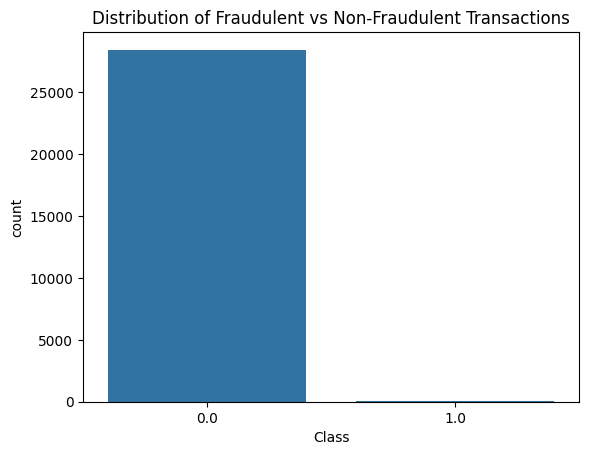

In [24]:
sns.countplot(data=sample_df, x='Class')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.show()

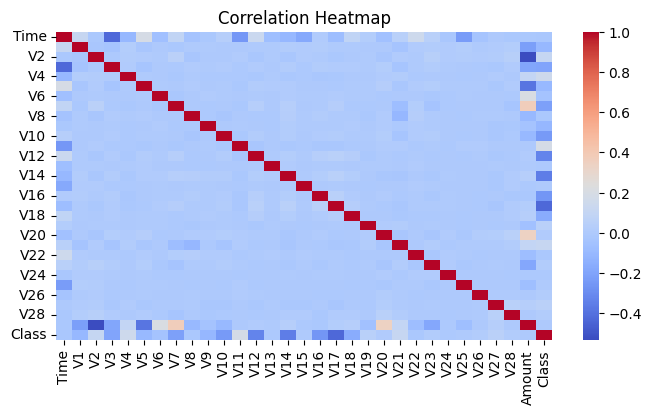

In [29]:
corr = sample_df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [26]:
mean_amount = df.groupby("Class")["Amount"].mean().compute()
print(mean_amount)

Class
0.0     88.291022
1.0    122.211321
Name: Amount, dtype: float64


In [30]:
total_fraud_amount = df[df["Class"] == 1]["Amount"].sum().compute()
print(f"Total amount lost due to fraud: ${total_fraud_amount:.2f}")

Total amount lost due to fraud: $60127.97


- The dataset is highly imbalanced: very few fraudulent transactions.
- Fraudulent transactions have lower average amounts.
- Some features are highly correlated, which could help in future modeling.
- A significant amount of money is lost due to fraudulent activity.
